## Actividad 

### Análisis univariado variable “Age”

Utilizaremos información del dataset titanic para realizar una primer parte del análisis univariado de la variable “Age”


In [1]:
# Importar librerías necesarias (pandas y numpy)
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Cargar dataset titanic
url = "https://raw.githubusercontent.com/xlisouski/DataCoder/main/Titanic.csv"
df = pd.read_csv(url, sep=",")

In [3]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
# Calcular medidas de posición de la columna “Age” (media, mediana, primer cuartil, tercer cuartil)
media = df["Age"].mean()
print(f"Media: {media.round(2)}")
mediana = df["Age"].median()
print(f"Mediana: {mediana.round(2)}")
primer_cuartil = df["Age"].quantile(0.25)
print(f"Primer Cuartil: {primer_cuartil.round(2)}")
tercer_cuartil = df["Age"].quantile(0.75)
print(f"Tercer Cuartil: {tercer_cuartil.round(2)}")

Media: 29.7
Mediana: 28.0
Primer Cuartil: 20.12
Tercer Cuartil: 38.0


In [5]:
# Calcular medidas de dispersión de la columna “Age” (rango, rango intercuartílico, varianza, desvío)
rango = df["Age"].max() - df["Age"].min()
print(f"Rango: {rango.round(2)}")
rango_iq = df["Age"].quantile(0.75) - df["Age"].quantile(0.25)
print(f"Rango intercuartílico: {rango_iq.round(2)}")
varianza = df["Age"].var()
print(f"Varianza: {varianza.round(2)}")
desvio = df["Age"].std()
print(f"Desvío estándar: {desvio.round(2)}")

Rango: 79.58
Rango intercuartílico: 17.88
Varianza: 211.02
Desvío estándar: 14.53


In [6]:
# Calcular coeficiente de variación ¿Qué tan dispersa está la variable?
cv = df["Age"].std() / df["Age"].mean()
print(f"Cofeiciente de variación: {cv.round(2)}")

Cofeiciente de variación: 0.49


---
### Análisis univariado variable "Age"
Mostrar un histograma de la variable “Age” usando Seaborn (antes importar las librerías necesarias). Usar los siguientes parámetros: 

> bins = 30,    
> alpha = 0.3,  
>kde = True,    
> stat='probability'    


In [7]:
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")  # para ignorar los warning de seaborn en vscode

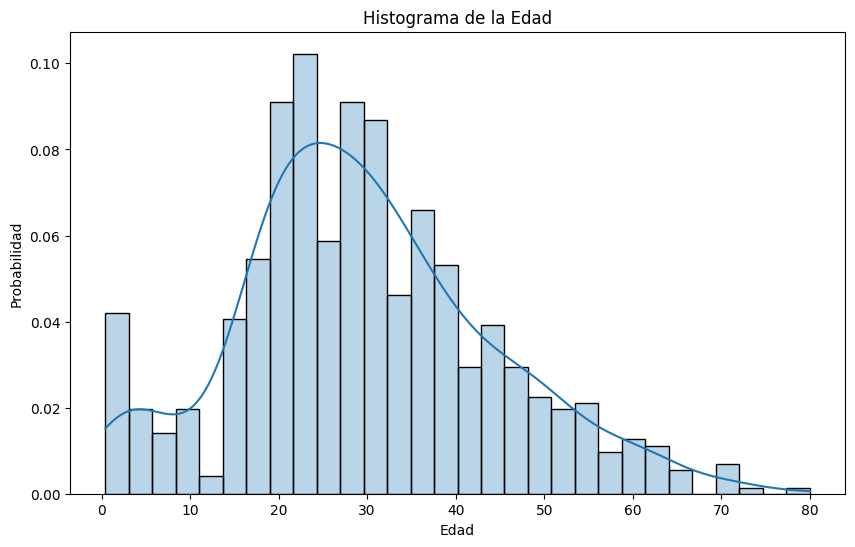

In [8]:
# Histograma de la variable "Age" con Seaborn
plt.figure(figsize=(10, 6))
sns.histplot(df["Age"], bins=30, alpha=0.3, kde=True, stat="probability")
plt.title("Histograma de la Edad")
plt.xlabel("Edad")
plt.ylabel("Probabilidad")
plt.show()

Calcular coeficiente de asimetría. ¿Qué tipo de simetría tiene la variable? ¿Coincide con lo que se ve en el gráfico?

$$
S = \frac{1}{N} \sum_{i=1}^{N} \left( \frac{x_i - \text{media}}{\text{desvío}} \right)^3
$$


In [9]:
# contamos la cantidad de observaciones
observaciones_age = df["Age"].count()
observaciones_age

714

In [10]:
# coef de siemtria = Σ((xᵢ - mean) / std_dev)³ / N
result = ((df["Age"].dropna() - media) / desvio) ** 3
result

0     -0.148881
1      0.186591
2     -0.016512
3      0.048592
4      0.048592
         ...   
885    0.262476
886   -0.006415
887   -0.399541
889   -0.016512
890    0.003974
Name: Age, Length: 714, dtype: float64

In [11]:
# calculo manual del coeficiente de siemtria
coef_simetria = np.sum(result) / observaciones_age
print(f"Coeficiente de asimetría: {coef_simetria.round(4)}")

Coeficiente de asimetría: 0.3875


In [12]:
# Calcular el coeficiente de simetria
skewness = df["Age"].dropna().skew()
print(f"Coeficiente de asimetría (metodo skew()): {skewness.round(4)}")

Coeficiente de asimetría (metodo skew()): 0.3891


In [13]:
# Calculo del coeficiente de siemtria metodo Coder
from scipy.stats import skew

coeficiente_asimetria = skew(df["Age"].dropna())
print(
    f"Coeficiente de asimetría (libreria scipy.stats): {coeficiente_asimetria.round(4)}"
)

Coeficiente de asimetría (libreria scipy.stats): 0.3883


---
### Conclusiones

- El resultado positivo nos indica que tenemos un sesgo hacia la derecha en la distribución de la variables "Age", lo que significa que es asimétrica positiva
- Coincide perfectamente con lo que vimos en el gráfico.

---
### Recalculando el coeficiente de asimetría sin valores nulos

Los nulos serán reempalzados por la media

In [14]:
# Verificamos valores nulos
null_check = df["Age"].isnull().sum()
null_check

177

In [15]:
# Rellenamos los nulos con la media
df["Age"] = df["Age"].fillna(media)

In [16]:
# Verificamos valores nulos nuevamente
null_check = df["Age"].isnull().sum()
null_check

0

In [17]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [18]:
# calculamos nuevamente la media y la desviación
media2 = df["Age"].mean()
desvio2 = df["Age"].std()

# calculamos el nuevo numero de observaciones
observaciones_age2 = df["Age"].count()
observaciones_age2

891

In [19]:
# coef de siemtria = Σ((xᵢ - mean) / std_dev)³ / N
result2 = ((df["Age"] - media2) / desvio2) ** 3
result2

0     -0.207630
1      0.260220
2     -0.023028
3      0.067766
4      0.067766
         ...   
886   -0.008946
887   -0.557201
888    0.000000
889   -0.023028
890    0.005542
Name: Age, Length: 891, dtype: float64

In [20]:
coef_simetria2 = np.sum(result2) / observaciones_age2
print(
    f"Coeficiente de asimetría (nulos reemplazados con la media): {coef_simetria2.round(4)}"
)

Coeficiente de asimetría (nulos reemplazados con la media): 0.433


---
### Conclusiones

- Reemplazar los valores nulos por la media, no altero el resultado, seguimos con un sesgo positivo a la derecha.